In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics  
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import os # accessing directory structure


df = pd.read_csv('Dataset_pandas_assign.csv')  # data processing, CSV file I/O (e.g. pd.read_csv)
df

,Unique number,"Возраст, полных лет",Гражданство,Стаж вождения,Пол,КБМ,Город,Марка,Модель,Тип ТС,Год выпуска,Расположение руля,Объём двигателя,Цвет,Период страхования,Страховая премия,Льготы,Дата проишествия,Регион ДТП,Сумма убытка
0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,18,19,23,25,26.0
1,74d88aec9cfe39a1bc5a93314c4326dc,30,Казахстан,10,М,8,Алматы,156,Alfa romeo,Легковые автомобили,12/1/2000,Слева,3000,красный,14.06.2013-13.06.2014,17625,NaN,NaN,NaN,NaN
2,c13fe1fef2192e82056e26544c3efed3,36,Казахстан,17,М,8,Нур-Султан,156,Alfa romeo,Легковые автомобили,12/1/2001,Слева,2387,синий,19.07.2013-18.07.2014,8484,NaN,NaN,NaN,NaN
3,8dd751c0f9c0cf216303a0d445099e1b,46,Казахстан,28,М,8,Алматы,Rsv 1000r,Aprilia,Мотоциклы и мотороллеры,12/1/2005,Слева,998,красный,07.06.2013-06.06.2014,8031,NaN,NaN,NaN,NaN
4,005f21aeed2db9c1694f724f365be6b5,45,Казахстан,13,М,7,Нур-Султан,80,Audi,Легковые автомобили,12/1/1992,Слева,1984,серебристый металлик архивный,30.05.2013-29.11.2013,6709,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,c6a3b53d633ff4155492e2e19b9a8010,57,Казахстан,35,М,8,Павлодар,Нива 212300-55,Шевроле,Легковые автомобили,12/1/2012,Слева,1690,серый металлик,12.06.2013-10.04.2014,6976,NaN,NaN,NaN,NaN
10906,c84892e816bec0dbd5429c75fb57b305,55,Казахстан,20,М,9,Петропавловск,Нива 212300-55I,Шевроле,Легковые автомобили,1/1/2012,Слева,1690,серебристый,16.06.2013-15.06.2014,6400,NaN,NaN,NaN,NaN
10907,d406878650cbf18002d29968bf832c31,73,Казахстан,45,М,8,Костанай,Нива 212300-55I,Шевроле,Легковые автомобили,12/1/2010,Слева,1700,снежная королева,18.06.2013-17.06.2014,10053,NaN,NaN,NaN,NaN
10908,dcb07973b07a508c4680406b38fdfa56,67,Казахстан,20,М,8,Усть-Каменогорск,Нива 212300-55glc,Шевроле,Легковые автомобили,12/1/2011,Слева,1690,снежная королева,01.07.2013-30.06.2014,5052,Инвалид,NaN,NaN,NaN


In [3]:
df['Гражданство'].unique()

array(['3', 'Казахстан', 'Россия', 'Таджикистан', 'Индия', 'Молдова',
       'Украина', 'Кыргызстан'], dtype=object)

In [4]:
Statistics of age at and its correlation to car ownership

SyntaxError: invalid syntax (1044623078.py, line 1)

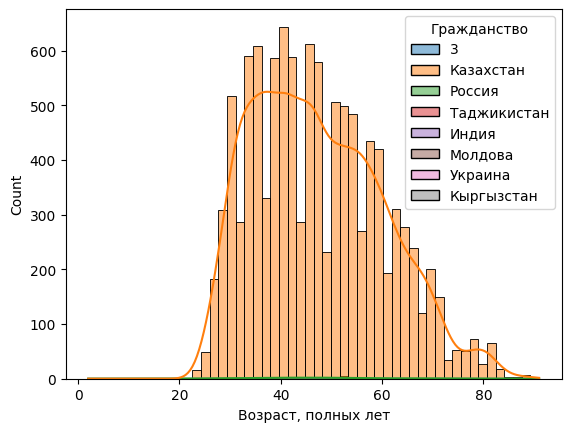

In [5]:
sns.histplot(x='Возраст, полных лет', data=df, kde=True, hue='Гражданство')
plt.show()

In [ ]:
Statistics of car ownership depending on gender

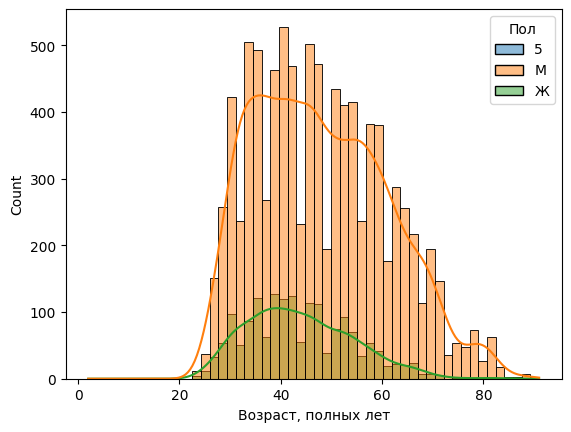

In [6]:
sns.histplot(x='Возраст, полных лет', data=df, kde=True, hue='Пол')
 
plt.show()

In [ ]:
Table with the dependence of driving experience on gender and age

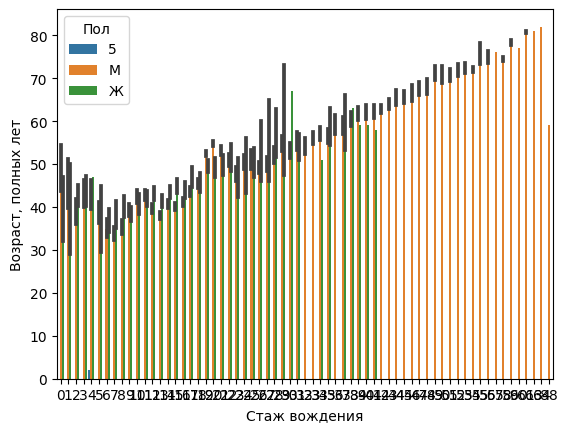

In [7]:
import matplotlib.pyplot as plt
sns.barplot(x='Стаж вождения',y='Возраст, полных лет', data=df, hue='Пол')
plt.rcParams['figure.figsize'] = [2, 15]
plt.show()

In [ ]:
Preference for cars depending on age

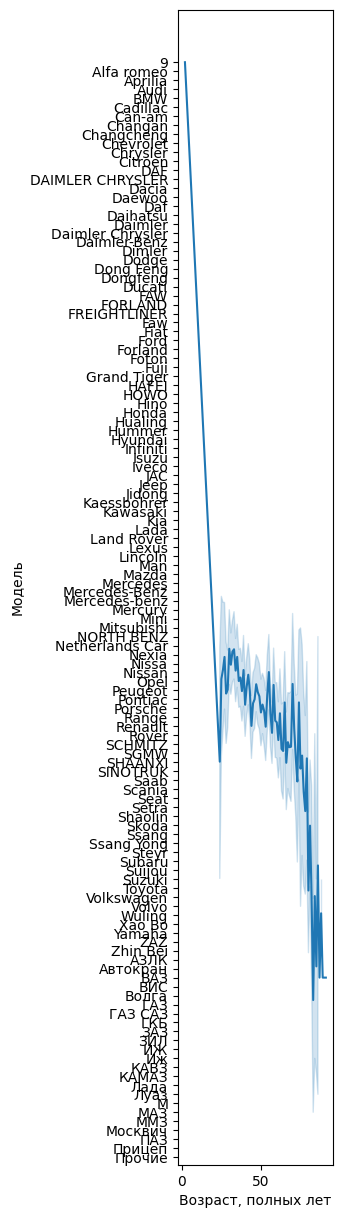

In [8]:
sns.lineplot(x='Возраст, полных лет', y='Модель', data=df)
plt.rcParams['figure.figsize'] = [20, 10]
plt.show()

In [9]:
Q1=df.groupby('Пол', as_index=False)['Возраст, полных лет'].mean().round(0)
Q1.rename(columns = {'Возраст, полных лет':'Средний возраст, лет'}, inplace = True)

# percentage of road accidents based on genders

road_accidents = df['Дата проишествия'].count() # count all road accidents
road_accidents_by_genders = df.groupby('Пол', as_index=False)['Дата проишествия'].count() # road accidents based on genders

Q1['Процент дорожно-транспортных происшествий, %'] = ((road_accidents_by_genders['Дата проишествия'] / road_accidents) * 100).round(0)
Q1

,Пол,"Средний возраст, лет","Процент дорожно-транспортных происшествий, %"
0,5,2.0,1.0
1,Ж,44.0,18.0
2,М,48.0,81.0


In [10]:
# most frequent vehicle-make company for females in Almaty, Shymkent and Nur-Sultan
# sort the records in which the cities correspond to the selected 5 city

Q5 = df[df['Город'].isin(['Петропавловск', 'Костанай', 'Нур-Султан', 'Актау', 'Караганда'])]
Q5 = Q5.groupby(['Город'])['Модель'].agg(pd.Series.mode)
Q5

Город
Актау                                 Toyota
Караганда        [Mercedes-Benz, Volkswagen]
Костанай                                 ВАЗ
Нур-Султан                            Toyota
Петропавловск                     Volkswagen
Name: Модель, dtype: object

In [11]:
df['Цвет'].unique()

array(['14', 'красный', 'синий', 'серебристый металлик архивный',
       'серый металлик', 'серый', 'синий металлик', 'зелёный', 'белый',
       'коричневый', 'черный металлик', 'темно-синий металлик',
       'темно-вишневый', 'серебристый', 'светло-зелёный', 'черный',
       'зеленый металлик', 'фиолетовый металлик',
       'темно-серый металлик архивный', 'вишневый металлик',
       'мокрый асфальт', 'темно-синий', 'светло-зелёный металлик',
       'бордовый', 'темно-бордовый металлик', 'темно-зеленый металлик',
       'бежевый', 'желтый', 'бордовый металлик', 'темно-фиолетовый',
       'фиолетовый', 'зелёный металлик', 'темно-зеленый', 'серый металик',
       'темно-коричневый', 'белый перламутровый', 'красный металлик',
       'голубой металлик', 'вишневый', 'золотистый металлик',
       'золотистый', 'черный перламутровый', 'белый металлик',
       'красно-коричневый', 'темно-серый', 'зелёный перламутровый',
       'оранжевый металлик', 'спелая вишня', 'серебристый металлик',
    

In [12]:
# What kind of vehicle colors people prefer most, dark ones or light ones?
# created two lists of dark and light colors
dark = ['черный', 'синий', 'серый', 'серый металлик', 'черный металлик', 'темно-синий металлик', 'темно-синий']
light =['серебристый металлик архивный', 'белый', 'серебристый', 'красный', 'зелёный', 'синий металлик', 'зеленый металлик', 'золотистый металлик', 'комбинированный', 'белый металлик', 'вишневый', 'бежевый ', 'голубой'] 

# divided the colors in df into dark and light vehicles
df.loc[(df['Цвет'].isin(dark)), 'Тон' ] = 'Темный'
df.loc[(df['Цвет'].isin(light)), 'Тон' ] = 'Светлый'

# grouped records by tone and calculated which car tone is most preferable
Q6 = df.groupby(by='Тон')['Тон'].count().sort_values(ascending=False)
Q6

Тон
Светлый    5759
Темный     2901
Name: Тон, dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unique number        10910 non-null  object 
 1   Возраст, полных лет  10910 non-null  int64  
 2   Гражданство          10910 non-null  object 
 3   Стаж вождения        10910 non-null  int64  
 4   Пол                  10910 non-null  object 
 5   КБМ                  10910 non-null  int64  
 6   Город                10910 non-null  object 
 7   Марка                10910 non-null  object 
 8   Модель               10910 non-null  object 
 9   Тип ТС               10910 non-null  object 
 10  Год выпуска          10910 non-null  object 
 11  Расположение руля    10910 non-null  object 
 12  Объём двигателя      10910 non-null  int64  
 13  Цвет                 10910 non-null  object 
 14  Период страхования   10910 non-null  object 
 15  Страховая премия     10910 non-null 

In [14]:
df.describe()

,"Возраст, полных лет",Стаж вождения,КБМ,Объём двигателя,Страховая премия,Сумма убытка
count,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,1.360000e+02
mean,47.352521,18.019523,7.367461,2391.887626,10930.719798,3.538577e+05
std,12.801961,8.777063,1.705567,1332.621698,5732.394588,4.549910e+05
min,2.000000,0.000000,1.000000,13.000000,18.000000,2.600000e+01
25%,37.000000,12.000000,7.000000,1700.000000,6404.750000,1.055105e+05
50%,46.000000,18.000000,8.000000,2000.000000,9474.000000,2.089160e+05
75%,56.000000,20.000000,9.000000,2700.000000,15667.000000,3.943585e+05
max,91.000000,88.000000,9.000000,18000.000000,59669.000000,2.525000e+06


In [15]:
df.isnull().values.any()

True

In [16]:
df.dtypes

Unique number           object
Возраст, полных лет      int64
Гражданство             object
Стаж вождения            int64
Пол                     object
КБМ                      int64
Город                   object
Марка                   object
Модель                  object
Тип ТС                  object
Год выпуска             object
Расположение руля       object
Объём двигателя          int64
Цвет                    object
Период страхования      object
Страховая премия         int64
Льготы                  object
Дата проишествия        object
Регион ДТП              object
Сумма убытка           float64
Тон                     object
dtype: object

In [17]:
df.isna()

,Unique number,"Возраст, полных лет",Гражданство,Стаж вождения,Пол,КБМ,Город,Марка,Модель,Тип ТС,...,Расположение руля,Объём двигателя,Цвет,Период страхования,Страховая премия,Льготы,Дата проишествия,Регион ДТП,Сумма убытка,Тон
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,False
10906,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,False
10907,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,True
10908,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True


In [19]:
df.isnull().sum()

Unique number              0
Возраст, полных лет        0
Гражданство                0
Стаж вождения              0
Пол                        0
КБМ                        0
Город                      0
Марка                      0
Модель                     0
Тип ТС                     0
Год выпуска                0
Расположение руля          0
Объём двигателя            0
Цвет                       0
Период страхования         0
Страховая премия           0
Льготы                  9713
Дата проишествия       10773
Регион ДТП             10773
Сумма убытка           10774
dtype: int64

In [25]:
df.fillna(0, inplace = True)
missing_vals = ["NA", "NaN", "", None, np.NaN]
missing = df.isin(missing_vals)
df.mask(missing, "missing").head()
df.isnull().sum()

Unique number          0
Возраст, полных лет    0
Гражданство            0
Стаж вождения          0
Пол                    0
КБМ                    0
Город                  0
Марка                  0
Модель                 0
Тип ТС                 0
Год выпуска            0
Расположение руля      0
Объём двигателя        0
Цвет                   0
Период страхования     0
Страховая премия       0
Льготы                 0
Дата проишествия       0
Регион ДТП             0
Сумма убытка           0
dtype: int64

In [20]:
df.drop(df.columns[df.isnull().mean()>0.50], axis=1)

,Unique number,"Возраст, полных лет",Гражданство,Стаж вождения,Пол,КБМ,Город,Марка,Модель,Тип ТС,...,Расположение руля,Объём двигателя,Цвет,Период страхования,Страховая премия,Льготы,Дата проишествия,Регион ДТП,Сумма убытка,Тон
0,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,18,19,23,25,26.0,0
1,74d88aec9cfe39a1bc5a93314c4326dc,30,Казахстан,10,М,8,Алматы,156,Alfa romeo,Легковые автомобили,...,Слева,3000,красный,14.06.2013-13.06.2014,17625,0,0,0,0.0,Светлый
2,c13fe1fef2192e82056e26544c3efed3,36,Казахстан,17,М,8,Нур-Султан,156,Alfa romeo,Легковые автомобили,...,Слева,2387,синий,19.07.2013-18.07.2014,8484,0,0,0,0.0,Темный
3,8dd751c0f9c0cf216303a0d445099e1b,46,Казахстан,28,М,8,Алматы,Rsv 1000r,Aprilia,Мотоциклы и мотороллеры,...,Слева,998,красный,07.06.2013-06.06.2014,8031,0,0,0,0.0,Светлый
4,005f21aeed2db9c1694f724f365be6b5,45,Казахстан,13,М,7,Нур-Султан,80,Audi,Легковые автомобили,...,Слева,1984,серебристый металлик архивный,30.05.2013-29.11.2013,6709,0,0,0,0.0,Светлый
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,c6a3b53d633ff4155492e2e19b9a8010,57,Казахстан,35,М,8,Павлодар,Нива 212300-55,Шевроле,Легковые автомобили,...,Слева,1690,серый металлик,12.06.2013-10.04.2014,6976,0,0,0,0.0,Темный
10906,c84892e816bec0dbd5429c75fb57b305,55,Казахстан,20,М,9,Петропавловск,Нива 212300-55I,Шевроле,Легковые автомобили,...,Слева,1690,серебристый,16.06.2013-15.06.2014,6400,0,0,0,0.0,Светлый
10907,d406878650cbf18002d29968bf832c31,73,Казахстан,45,М,8,Костанай,Нива 212300-55I,Шевроле,Легковые автомобили,...,Слева,1700,снежная королева,18.06.2013-17.06.2014,10053,0,0,0,0.0,0
10908,dcb07973b07a508c4680406b38fdfa56,67,Казахстан,20,М,8,Усть-Каменогорск,Нива 212300-55glc,Шевроле,Легковые автомобили,...,Слева,1690,снежная королева,01.07.2013-30.06.2014,5052,Инвалид,0,0,0.0,0


<AxesSubplot: >

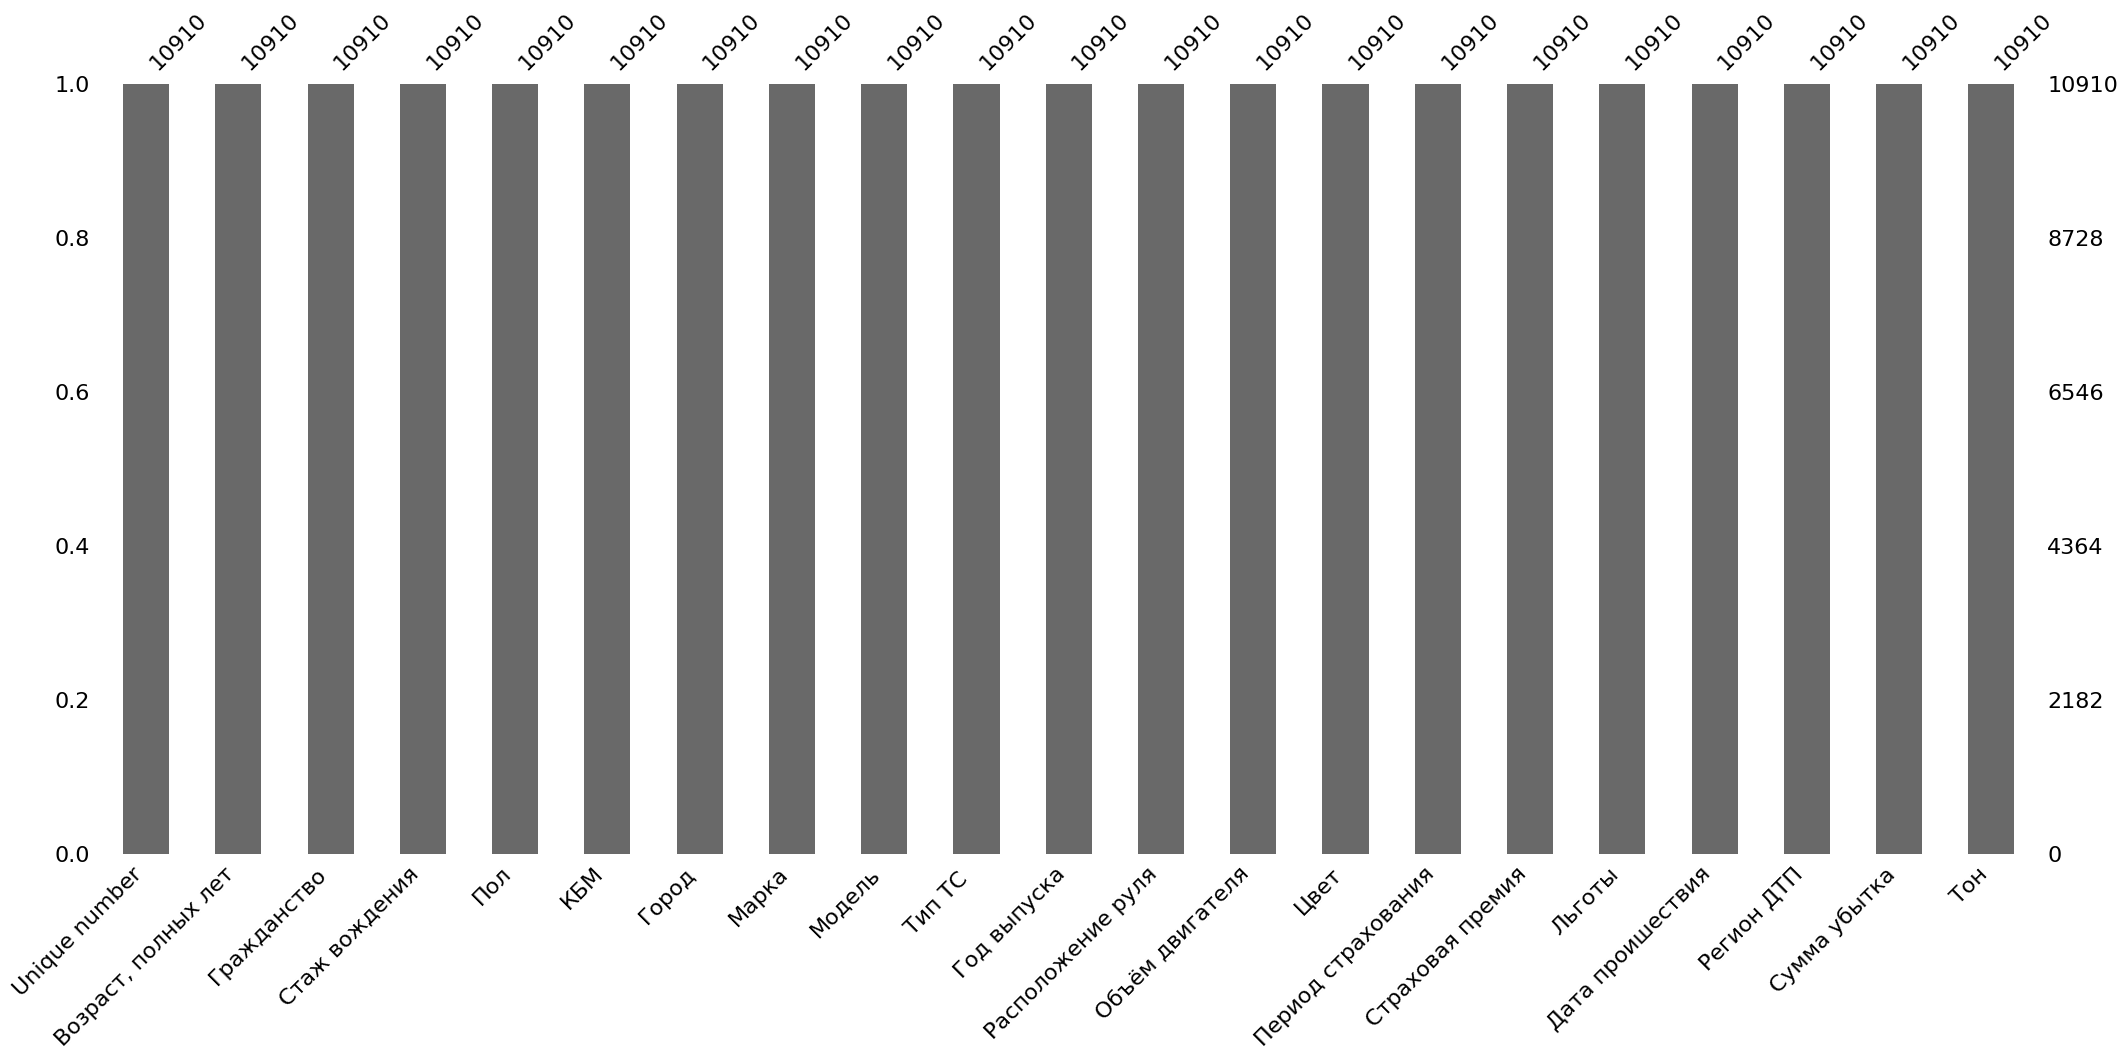

In [21]:
import missingno as msno 
msno.bar(df) 

In [22]:
df.reset_index(inplace=True, drop=True)
print(df.columns.to_list())

['Unique number', 'Возраст, полных лет', 'Гражданство', 'Стаж вождения', 'Пол', 'КБМ', 'Город', 'Марка', 'Модель', 'Тип ТС ', 'Год выпуска', 'Расположение руля', 'Объём двигателя', 'Цвет', 'Период страхования', 'Страховая премия', 'Льготы', 'Дата проишествия', 'Регион ДТП', 'Сумма убытка', 'Тон']


In [39]:
df.drop('Unique number',axis=1, inplace = True)

In [23]:
df.head()

,Unique number,"Возраст, полных лет",Гражданство,Стаж вождения,Пол,КБМ,Город,Марка,Модель,Тип ТС,...,Расположение руля,Объём двигателя,Цвет,Период страхования,Страховая премия,Льготы,Дата проишествия,Регион ДТП,Сумма убытка,Тон
0,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,18,19,23,25,26.0,0
1,74d88aec9cfe39a1bc5a93314c4326dc,30,Казахстан,10,М,8,Алматы,156,Alfa romeo,Легковые автомобили,...,Слева,3000,красный,14.06.2013-13.06.2014,17625,0,0,0,0.0,Светлый
2,c13fe1fef2192e82056e26544c3efed3,36,Казахстан,17,М,8,Нур-Султан,156,Alfa romeo,Легковые автомобили,...,Слева,2387,синий,19.07.2013-18.07.2014,8484,0,0,0,0.0,Темный
3,8dd751c0f9c0cf216303a0d445099e1b,46,Казахстан,28,М,8,Алматы,Rsv 1000r,Aprilia,Мотоциклы и мотороллеры,...,Слева,998,красный,07.06.2013-06.06.2014,8031,0,0,0,0.0,Светлый
4,005f21aeed2db9c1694f724f365be6b5,45,Казахстан,13,М,7,Нур-Султан,80,Audi,Легковые автомобили,...,Слева,1984,серебристый металлик архивный,30.05.2013-29.11.2013,6709,0,0,0,0.0,Светлый


In [25]:
df = df.drop_duplicates()

In [26]:
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 10886 rows and 20 columns


In [27]:
df['Марка'].value_counts()

Camry                437
Passat               371
.                    325
Golf                 230
Rav 4                228
                    ... 
Minica                 1
Sigma                  1
L200 Pick-Up           1
H60w                   1
Нива 212300-55glc      1
Name: Марка, Length: 1106, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

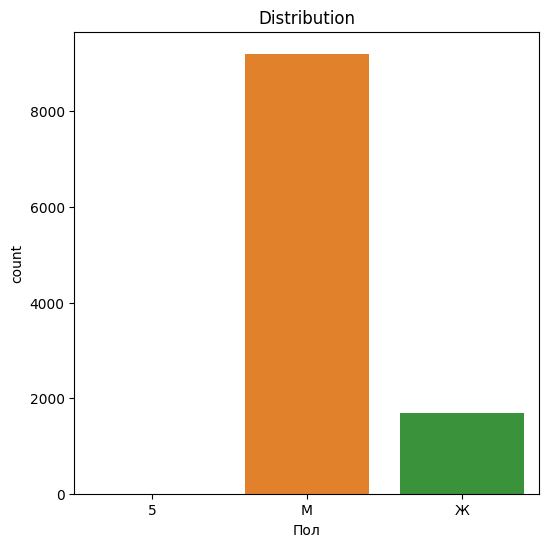

In [28]:
plt.figure(figsize=(6,6))
sns.countplot(x='Пол', data=df)
plt.title('Distribution')
plt.show


In [29]:
gender = df.Пол.value_counts()
gender

М    9205
Ж    1680
5       1
Name: Пол, dtype: int64

([<matplotlib.patches.Wedge at 0x2288aef79a0>,
 [Text(0.9730808393443342, -0.5129460791359325, 'М'),
  Text(-0.9729327602854407, 0.5132268932580926, 'Ж'),
  Text(-1.0999999541845578, 0.0003174806622224486, '5')],
 [Text(0.5307713669150913, -0.27978877043778133, '84.6%'),
  Text(-0.5306905965193313, 0.2799419417771413, '15.4%'),
  Text(-0.5999999750097588, 0.00017317127030315376, '0.0%')])

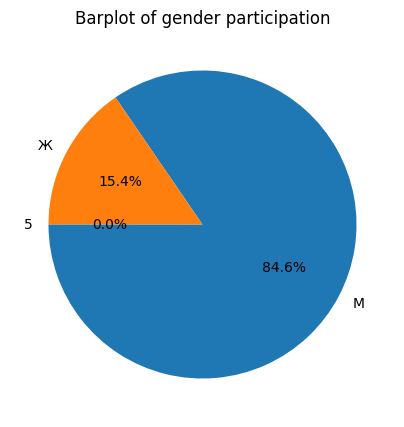

In [30]:
import seaborn as sns 
plt.figure(figsize=(5,5))
plt.title('Barplot of gender participation')
plt.pie(gender, labels=gender.index, autopct='%1.1f%%', startangle=180)

In [31]:
df['Пол'].value_counts()

М    9205
Ж    1680
5       1
Name: Пол, dtype: int64

In [32]:
model = df.Модель.value_counts()
model.head()

Toyota        2177
Volkswagen    1054
ВАЗ            892
Mitsubishi     772
Audi           704
Name: Модель, dtype: int64

In [33]:
mark = df.Марка.value_counts()
mark.head()

Camry     437
Passat    371
.         325
Golf      230
Rav 4     228
Name: Марка, dtype: int64

Text(0, 0.5, '')

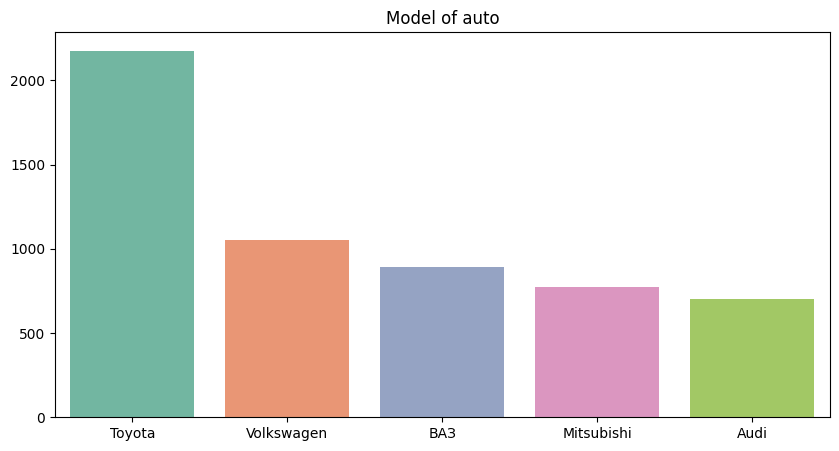

In [34]:
plt.figure(figsize=(10,5))
plt.title('Model of auto')
sns.barplot(x=model.head(5).index, y=model.head(5), palette= 'Set2') #head5 because we have a very lot 
plt.ylabel(None)

Text(0, 0.5, '')

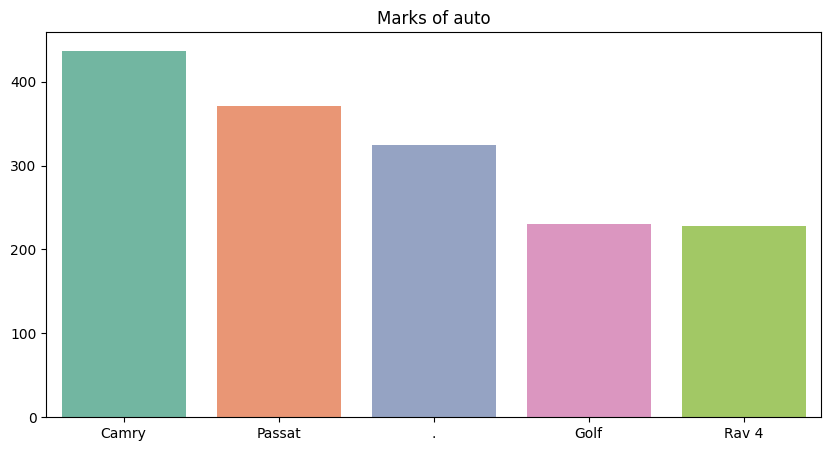

In [35]:
plt.figure(figsize=(10,5))
plt.title('Marks of auto')
sns.barplot(x=mark.head(5).index, y=mark.head(5), palette= 'Set2') #head5 because we have a very lot 
plt.ylabel(None)

# ML

<Figure size 1400x1400 with 0 Axes>

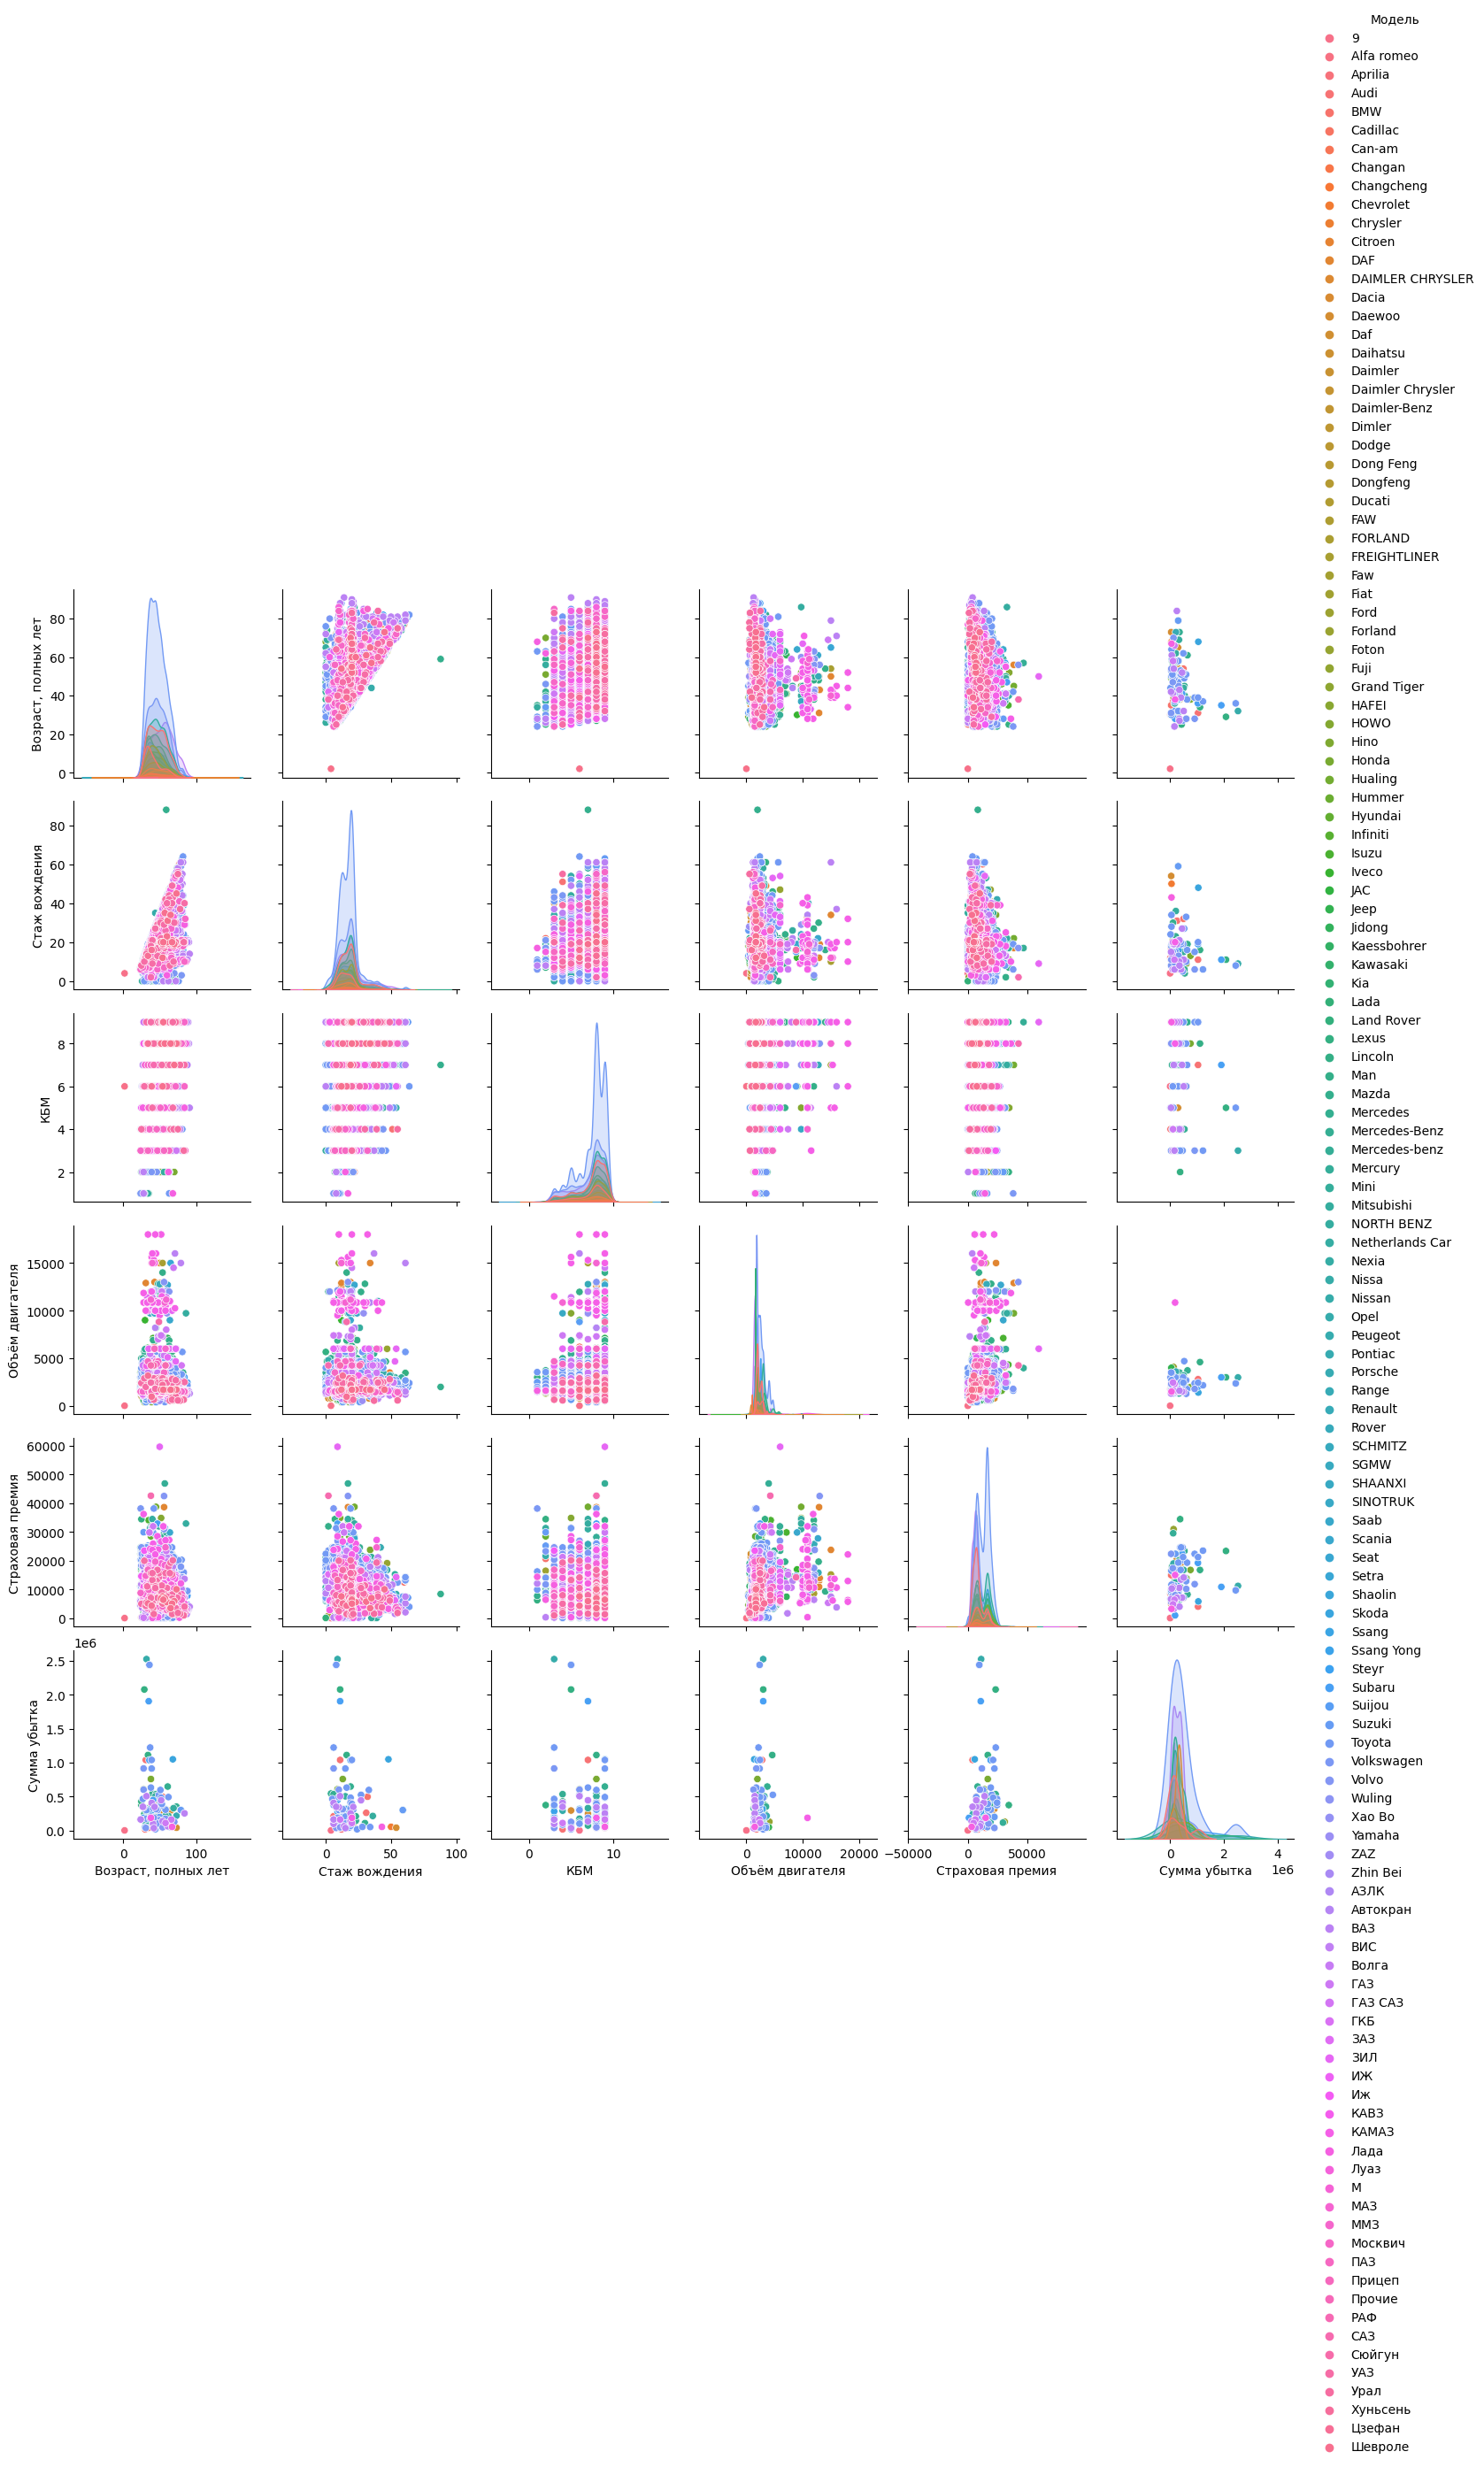

In [3]:
import numpy as np
import pandas as pd

#plotting the data
import matplotlib.pyplot as plt
import seaborn as sns
# from pandas.tools.plotting import scatter_matrix # we dont need this here

#preprocessing the dataset
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# #feature selection
from sklearn.decomposition import PCA

#sample selection/training and test set selection
from sklearn.model_selection import train_test_split

#classification algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#ensembled classificaiton algorithms
from sklearn.ensemble import RandomForestClassifier

#analysis of classificaiton algorithms
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

#remove warning to make the notebook prettier
import warnings
warnings.filterwarnings('ignore')

#plot graphs in the notebook
%matplotlib inline

plt.figure(figsize=(14,14))
sns.pairplot(data=df, hue='Модель')

In [39]:
df_model = df.groupby('Модель')
df_model.describe().T

Модель                        9    Alfa romeo  Aprilia          Audi  \
Возраст, полных лет count   1.0      2.000000      1.0  7.040000e+02   
                    mean    2.0     33.000000     46.0  4.713636e+01   
                    std     NaN      4.242641      NaN  1.229942e+01   
                    min     2.0     30.000000     46.0  2.500000e+01   
                    25%     2.0     31.500000     46.0  3.700000e+01   
                    50%     2.0     33.000000     46.0  4.600000e+01   
                    75%     2.0     34.500000     46.0  5.600000e+01   
                    max     2.0     36.000000     46.0  8.200000e+01   
Стаж вождения       count   1.0      2.000000      1.0  7.040000e+02   
                    mean    4.0     13.500000     28.0  1.829830e+01   
                    std     NaN      4.949747      NaN  8.637752e+00   
                    min     4.0     10.000000     28.0  0.000000e+00   
                    25%     4.0     11.750000     28.0  1.200000e+01   
                    50%     4.0     13.500000     28.0  1.800000e+01   
                    75%     4.0     15.250000     28.0  2.000000e+01   
                    max     4.0     17.000000     28.0  6.100000e+01   
КБМ                 count   1.0      2.000000      1.0  7.040000e+02   
                    mean    6.0      8.000000      8.0  7.384943e+00   
                    std     NaN      0.000000      NaN  1.737659e+00   
                    min     6.0      8.000000      8.0  3.000000e+00   
                    25%     6.0      8.000000      8.0  7.000000e+00   
                    50%     6.0      8.000000      8.0  8.000000e+00   
                    75%     6.0      8.000000      8.0  9.000000e+00   
                    max     6.0      8.000000      8.0  9.000000e+00   
Объём двигателя     count   1.0      2.000000      1.0  7.040000e+02   
                    mean   13.0   2693.500000    998.0  2.177460e+03   
                    std     NaN    433.456457      NaN  4.574713e+02   
                    min    13.0   2387.000000    998.0  1.400000e+03   
                    25%    13.0   2540.250000    998.0  1.800000e+03   
                    50%    13.0   2693.500000    998.0  2.000000e+03   
                    75%    13.0   2846.750000    998.0  2.598000e+03   
                    max    13.0   3000.000000    998.0  4.172000e+03   
Страховая премия    count   1.0      2.000000      1.0  7.040000e+02   
                    mean   18.0  13054.500000   8031.0  8.142778e+03   
                    std     NaN   6463.663087      NaN  4.371117e+03   
                    min    18.0   8484.000000   8031.0  7.800000e+01   
                    25%    18.0  10769.250000   8031.0  5.205000e+03   
                    50%    18.0  13054.500000   8031.0  7.145000e+03   
                    75%    18.0  15339.750000   8031.0  9.857000e+03   
                    max    18.0  17625.000000   8031.0  2.238100e+04   
Сумма убытка        count   1.0      2.000000      1.0  7.040000e+02   
                    mean   26.0      0.000000      0.0  2.799330e+03   
                    std     NaN      0.000000      NaN  4.204118e+04   
                    min    26.0      0.000000      0.0  0.000000e+00   
                    25%    26.0      0.000000      0.0  0.000000e+00   
                    50%    26.0      0.000000      0.0  0.000000e+00   
                    75%    26.0      0.000000      0.0  0.000000e+00   
                    max    26.0      0.000000      0.0  1.038600e+06   

Модель                               BMW      Cadillac   Can-am       Changan  \
Возраст, полных лет count     271.000000      2.000000      1.0      4.000000   
                    mean       40.774908     44.000000     37.0     53.750000   
                    std        11.472555      2.828427      NaN     13.573872   
                    min        25.000000     42.000000     37.0     42.000000   
                    25%        32.000000     43.000000     37.0   

In [40]:
label_encoder = LabelEncoder()
df['Модель'] = label_encoder.fit_transform(df['Модель'])
print(df['Модель'].value_counts())
print('\n{}'.format(df.info()))

92     2177
93     1054
102     892
63      772
3       704
       ... 
99        1
100       1
36        1
103       1
0         1
Name: Модель, Length: 131, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10886 entries, 0 to 10909
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Возраст, полных лет  10886 non-null  int64  
 1   Гражданство          10886 non-null  object 
 2   Стаж вождения        10886 non-null  int64  
 3   Пол                  10886 non-null  object 
 4   КБМ                  10886 non-null  int64  
 5   Город                10886 non-null  object 
 6   Марка                10886 non-null  object 
 7   Модель               10886 non-null  int32  
 8   Тип ТС               10886 non-null  object 
 9   Год выпуска          10886 non-null  object 
 10  Расположение руля    10886 non-null  object 
 11  Объём двигателя      10886 non-null  int64  
 12  Цвет          

# KNN

In [5]:
df.head(5)

,Unique number,"Возраст, полных лет",Гражданство,Стаж вождения,Пол,КБМ,Город,Марка,Модель,Тип ТС,Год выпуска,Расположение руля,Объём двигателя,Цвет,Период страхования,Страховая премия,Льготы,Дата проишествия,Регион ДТП,Сумма убытка
0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,18,19,23,25,26.0
1,74d88aec9cfe39a1bc5a93314c4326dc,30,Казахстан,10,М,8,Алматы,156,Alfa romeo,Легковые автомобили,12/1/2000,Слева,3000,красный,14.06.2013-13.06.2014,17625,NaN,NaN,NaN,NaN
2,c13fe1fef2192e82056e26544c3efed3,36,Казахстан,17,М,8,Нур-Султан,156,Alfa romeo,Легковые автомобили,12/1/2001,Слева,2387,синий,19.07.2013-18.07.2014,8484,NaN,NaN,NaN,NaN
3,8dd751c0f9c0cf216303a0d445099e1b,46,Казахстан,28,М,8,Алматы,Rsv 1000r,Aprilia,Мотоциклы и мотороллеры,12/1/2005,Слева,998,красный,07.06.2013-06.06.2014,8031,NaN,NaN,NaN,NaN
4,005f21aeed2db9c1694f724f365be6b5,45,Казахстан,13,М,7,Нур-Султан,80,Audi,Легковые автомобили,12/1/1992,Слева,1984,серебристый металлик архивный,30.05.2013-29.11.2013,6709,NaN,NaN,NaN,NaN


In [6]:
df['Стаж вождения'].unique()

array([ 4, 10, 17, 28, 13, 18, 19, 14, 15, 11, 39, 31, 20, 32, 35, 25, 16,
       23,  6,  9, 24, 21, 29, 12, 42,  8, 53, 30,  7, 44, 43, 34,  2, 33,
       26,  3, 40, 47, 38, 22, 36, 41, 46, 27,  5,  1, 37,  0, 51, 61, 50,
       48, 60, 49, 54, 56, 52, 55, 88, 45, 59, 58, 63, 64, 57],
      dtype=int64)

In [7]:
df.isnull().values.any()

True

In [8]:
df['Стаж вождения'].value_counts()

19    1479
20    1222
11     594
12     576
21     551
      ... 
63       1
64       1
60       1
88       1
57       1
Name: Стаж вождения, Length: 65, dtype: int64

<AxesSubplot: ylabel='count'>

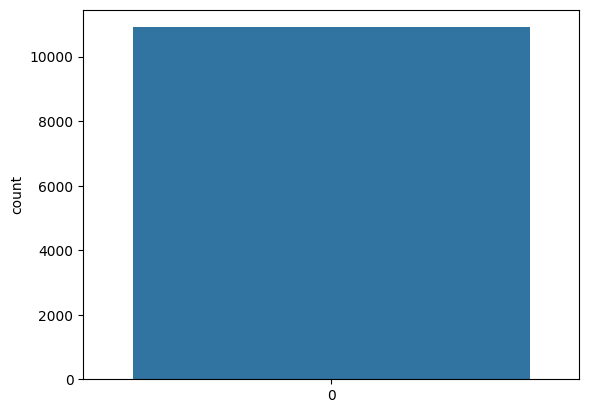

In [9]:
sns.countplot(df['Стаж вождения'])

In [10]:
df['Стаж вождения'].value_counts()

19    1479
20    1222
11     594
12     576
21     551
      ... 
63       1
64       1
60       1
88       1
57       1
Name: Стаж вождения, Length: 65, dtype: int64

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics 

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8182, 1138)
(2728, 1138)
(8182,)
(2728,)


In [21]:
X_train

array([[33,  0,  1, ...,  0,  0,  0],
       [14,  0,  1, ...,  0,  0,  0],
       [12,  0,  1, ...,  0,  0,  0],
       ...,
       [20,  0,  1, ...,  0,  0,  0],
       [10,  0,  1, ...,  0,  0,  0],
       [21,  0,  1, ...,  0,  0,  0]], dtype=int64)

<AxesSubplot: xlabel='Объём двигателя', ylabel='Страховая премия'>

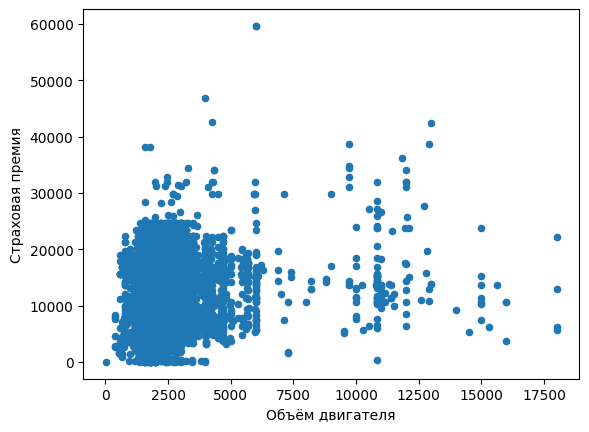

In [14]:
df.plot(kind='scatter', x= 'Объём двигателя', y='Страховая премия')

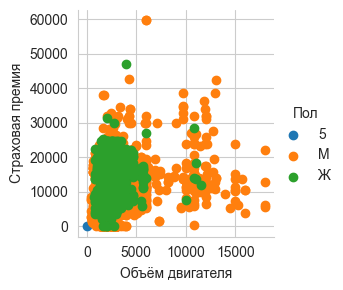

In [15]:
sns.set_style('whitegrid')
sns.FacetGrid(df, hue='Пол').map(plt.scatter, 'Объём двигателя', 'Страховая премия').add_legend()

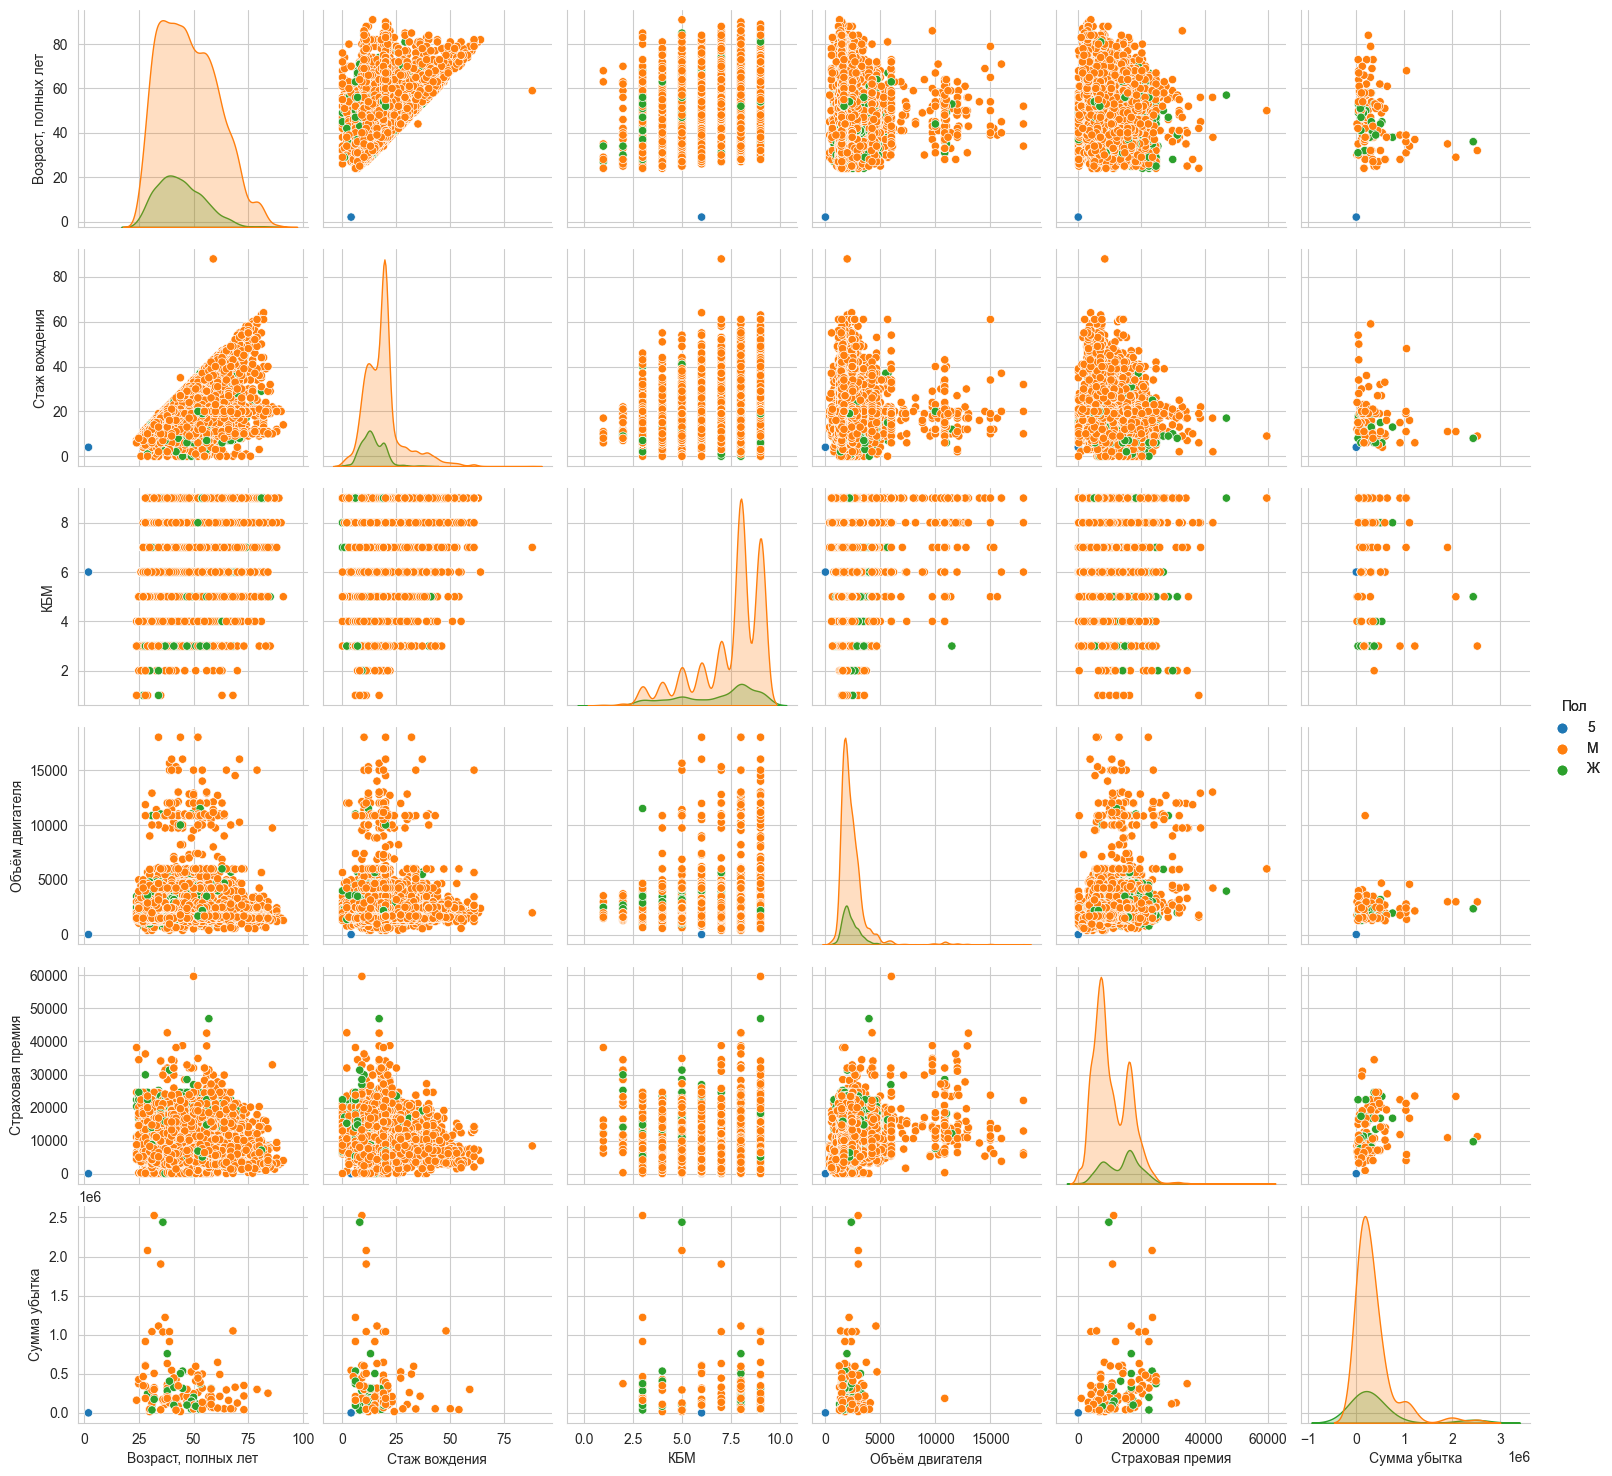

In [16]:
sns.pairplot(df, hue='Пол').add_legend()

<function matplotlib.pyplot.show(close=None, block=None)>

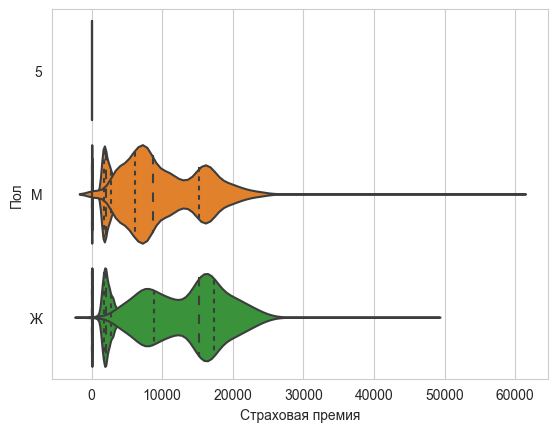

In [18]:
g = sns.violinplot(y='Пол', x='Возраст, полных лет', data = df, inner='quartile')
plt.show
g = sns.violinplot(y='Пол', x='Стаж вождения', data = df, inner='quartile')
plt.show
g = sns.violinplot(y='Пол', x='Объём двигателя', data = df, inner='quartile')
plt.show
g = sns.violinplot(y='Пол', x='Страховая премия', data = df, inner='quartile')
plt.show

In [34]:
for column in df.columns:
    if df[column].dtype == np.number:
        continue
df[column] = LabelEncoder().fit_transform(df[column])

C:\Users\Beksultan\AppData\Local\Temp\ipykernel_12468\2939085907.py:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:


In [3]:
df.dtypes

Unique number           object
Возраст, полных лет      int64
Гражданство             object
Стаж вождения            int64
Пол                     object
КБМ                      int64
Город                   object
Марка                   object
Модель                  object
Тип ТС                  object
Год выпуска             object
Расположение руля       object
Объём двигателя          int64
Цвет                    object
Период страхования      object
Страховая премия         int64
Льготы                  object
Дата проишествия        object
Регион ДТП              object
Сумма убытка           float64
dtype: object

In [6]:
X = df.iloc [:, [3,11,14]]

In [7]:
X = pd.get_dummies(X)

In [8]:
X.head()

,Стаж вождения,Расположение руля_12,Расположение руля_Слева,Расположение руля_Справа,Период страхования_01.06.2013-01.03.2014,Период страхования_01.06.2013-01.05.2014,Период страхования_01.06.2013-01.12.2013,Период страхования_01.06.2013-03.01.2014,Период страхования_01.06.2013-04.01.2014,Период страхования_01.06.2013-06.02.2014,...,Период страхования_31.05.2013-27.02.2014,Период страхования_31.05.2013-27.03.2014,Период страхования_31.05.2013-28.11.2013,Период страхования_31.05.2013-28.12.2013,Период страхования_31.05.2013-29.04.2014,Период страхования_31.05.2013-29.05.2014,Период страхования_31.05.2013-29.11.2013,Период страхования_31.05.2013-30.05.2014,Период страхования_31.05.2013-30.11.2013,Период страхования_31.07.2013-30.07.2014
0,4,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,17,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,28,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
X=X.values

In [10]:
X

array([[ 4,  1,  0, ...,  0,  0,  0],
       [10,  0,  1, ...,  0,  0,  0],
       [17,  0,  1, ...,  0,  0,  0],
       ...,
       [45,  0,  1, ...,  0,  0,  0],
       [20,  0,  1, ...,  0,  0,  0],
       [34,  0,  1, ...,  0,  0,  0]], dtype=int64)

In [11]:
y = df.iloc[:,-1].values

In [12]:
y

array([26., nan, nan, ..., nan, nan, nan])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
KNN = KNeighborsClassifier(n_neighbors= 5,
    weights='uniform', 
    algorithm= 'kd_tree',
    leaf_size = 30, 
    p = 2, 
    metric = 'minkowski', 
    n_jobs = -1)

In [23]:
KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', n_jobs=-1)

In [31]:
y_pred = KNN.predict(X_test)

In [114]:
from sklearn.metrics import classification_report, confusion_matrix

In [116]:
print('classification_report', classification_report(y_test, y_pred))

classification_report               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         3
          33       0.00      0.00      0.00         1
          37       0.00      0.00      0.00         1
          46       0.00      0.00      0.00         1
          54       0.00      0.00      0.00         1
          55       0.00      0.00      0.00         1
          59       0.00      0.00      0.00         1
          65       0.00      0.00      0.00         1
          66       0.00      0.00      0.00         1
          69       0.00      0.00      0.00         1
          72       0.00      0.00      0.00         1
          75       0.00      0.00      0.00         1
          77       0.00      0.00      0.00         1
     

c:\Users\Beksultan\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Beksultan\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Beksultan\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

In [118]:
from sklearn.model_selection import cross_val_score

In [123]:
print('Cross val score', cross_val_score(KNN, y_test.reshape(-1,1), y_pred, cv=10))
print('Cross val score', np.mean(cross_val_score(KNN, y_test.reshape(-1,1), y_pred)))

Cross val score [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Cross val score 1.0


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [125]:
knn5 = KNeighborsClassifier(n_neighbors = 5)
knn1 = KNeighborsClassifier(n_neighbors=1)

In [126]:
knn5.fit(X_train, y_train)
knn1.fit(X_train, y_train)

y_pred_5 = knn5.predict(X_test)
y_pred_1 = knn1.predict(X_test)

In [127]:
from sklearn.metrics import accuracy_score
print("Accuracy with k=5", accuracy_score(y_test, y_pred_5)*100)
print("Accuracy with k=1", accuracy_score(y_test, y_pred_1)*100)

Accuracy with k=5 98.79032258064517
Accuracy with k=1 97.76392961876833


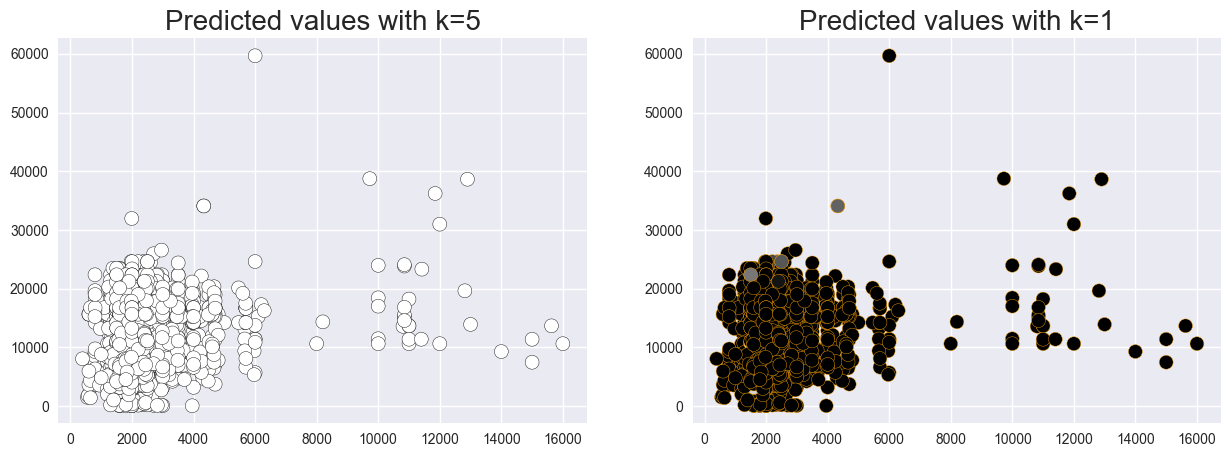

In [132]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred_5, s=100,edgecolors='black')
plt.title("Predicted values with k=5", fontsize=20)

plt.subplot(1,2,2)
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred_1, s=100,edgecolors='orange')
plt.title("Predicted values with k=1", fontsize=20)
plt.show()

# Linear Regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.metrics import r2_score

In [49]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(8182, 1138)
(2728, 1138)
(8182,)
(2728,)


In [50]:
model_lr = LinearRegression().fit(X, y)
model_lr

LinearRegression()

In [51]:
model_lr.coef_

array([-1.85634799e+02, -1.14187421e+14, -1.47909879e+14, ...,
        1.77243255e+09,  1.77243181e+09,  1.77243107e+09])

In [26]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [27]:
print(regressor.intercept_)

1344284677713892.0


In [28]:
print(regressor.coef_)

[-2.14080482e+02 -2.08321481e+15 -1.34227264e+15 ... -2.01204158e+12
 -2.01204158e+12 -2.01204158e+12]


In [32]:
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [33]:
y_test

array([     0.,      0., 236810., ...,      0.,      0.,      0.])

In [38]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error:  5068.618401759531
Mean Squared Error:  5728396070.269428
Root Mean Squared Error:  75686.16828899074


# SVM

In [50]:
# Importing required libraries
from seaborn import load_dataset, pairplot
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [49]:
sklearn.svm.SVC()

SVC()

In [17]:
df.shape


(10910, 20)

In [18]:
df.head(5)

,Unique number,"Возраст, полных лет",Гражданство,Стаж вождения,Пол,КБМ,Город,Марка,Модель,Тип ТС,Год выпуска,Расположение руля,Объём двигателя,Цвет,Период страхования,Страховая премия,Льготы,Дата проишествия,Регион ДТП,Сумма убытка
0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,18,19,23,25,26.0
1,74d88aec9cfe39a1bc5a93314c4326dc,30,Казахстан,10,М,8,Алматы,156,Alfa romeo,Легковые автомобили,12/1/2000,Слева,3000,красный,14.06.2013-13.06.2014,17625,NaN,NaN,NaN,NaN
2,c13fe1fef2192e82056e26544c3efed3,36,Казахстан,17,М,8,Нур-Султан,156,Alfa romeo,Легковые автомобили,12/1/2001,Слева,2387,синий,19.07.2013-18.07.2014,8484,NaN,NaN,NaN,NaN
3,8dd751c0f9c0cf216303a0d445099e1b,46,Казахстан,28,М,8,Алматы,Rsv 1000r,Aprilia,Мотоциклы и мотороллеры,12/1/2005,Слева,998,красный,07.06.2013-06.06.2014,8031,NaN,NaN,NaN,NaN
4,005f21aeed2db9c1694f724f365be6b5,45,Казахстан,13,М,7,Нур-Султан,80,Audi,Легковые автомобили,12/1/1992,Слева,1984,серебристый металлик архивный,30.05.2013-29.11.2013,6709,NaN,NaN,NaN,NaN


In [21]:
X=df.iloc[:, [1,3]]
Y=df.iloc[:, 5]

In [22]:
X.head()

,"Возраст, полных лет",Стаж вождения
0,2,4
1,30,10
2,36,17
3,46,28
4,45,13


In [23]:
Y.head()

0    6
1    8
2    8
3    8
4    7
Name: КБМ, dtype: int64

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=25, random_state = 0)

In [27]:
print("Training data : ", X_train.shape)
print("Training data : ", X_test.shape)

Training data :  (10885, 2)
Training data :  (25, 2)


In [28]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [30]:
from sklearn.svm import SVC
classfier = SVC(kernel= 'linear', random_state=0)
classfier.fit(X_train, Y_train)
Y_pred = classfier.predict(X_test)

In [31]:
Y_pred

array([8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8], dtype=int64)

In [35]:
print('Accuracy Score: with linear kernel')
print(metrics.accuracy_score(Y_test, Y_pred))

Accuracy Score: with linear kernel
0.32


In [38]:
classfier = SVC(kernel='rbf', gamma = 15, C=7, random_state=0)
classfier.fit(X_train, Y_train)
Y_pred = classfier.predict(X_test)
print('Accuracy Score on test Data: with default rbf kernel')
print(metrics.accuracy_score(Y_test, Y_pred))

Accuracy Score on test Data: with default rbf kernel
0.32


In [52]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 1 0 0 3 2]
 [0 0 1 0 0 3 0]
 [0 0 0 0 0 1 0]
 [0 0 1 0 0 5 2]
 [0 0 0 0 0 3 2]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         0
           5       0.33      0.17      0.22         6
           6       0.00      0.00      0.00         4
           7       0.00      0.00      0.00         1
           8       0.33      0.62      0.43         8
           9       0.33      0.40      0.36         5

    accuracy                           0.32        25
   macro avg       0.14      0.17      0.15        25
weighted avg       0.25      0.32      0.27        25



c:\Users\Beksultan\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Beksultan\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Beksultan\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average